<a href="https://colab.research.google.com/github/morenourey/CHAT/blob/main/ML_1_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SUP ML 1 - PREPROCESSING

# Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")

In [24]:
# fechas
from datetime import datetime

# gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

# algoritmos de clasificación
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# algoritmos de regresión
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# métricas
import sklearn.metrics as metrics

# hiperparametrización
from sklearn.model_selection import GridSearchCV

# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

import xgboost as xgb

from numpy import random
random.seed(42)

In [2]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.9 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/NUCLIO/telecom_churn_TRAINTEST.csv')

# Importar train data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv('/content/drive/MyDrive/NUCLIO/telecom_churn_TRAINTEST.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 100 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               89866 non-null  float64
 1   mou               89866 non-null  float64
 2   totmrc            89866 non-null  float64
 3   da                89866 non-null  float64
 4   ovrmou            89866 non-null  float64
 5   ovrrev            89866 non-null  float64
 6   vceovr            89866 non-null  float64
 7   datovr            89866 non-null  float64
 8   roam              89866 non-null  float64
 9   change_mou        89405 non-null  float64
 10  change_rev        89405 non-null  float64
 11  drop_vce          90000 non-null  float64
 12  drop_dat          90000 non-null  float64
 13  blck_vce          90000 non-null  float64
 14  blck_dat          90000 non-null  float64
 15  unan_vce          90000 non-null  float64
 16  unan_dat          90000 non-null  float

In [12]:
columnas_categoricas = df.select_dtypes(include=['object']).columns.tolist()
for columna in columnas_categoricas:
    print(df[columna].value_counts().to_string().replace('\n', '\n\t'))
    print("\n")

new_cell
	U    58812
	Y    18114
	N    13074


crclscod
	AA    34152
	A     15602
	BA    11270
	CA     7389
	EA     5521
	B      3743
	DA     3201
	ZA     3177
	C      1418
	A2      771
	U       429
	E       330
	E4      305
	GA      265
	D       244
	G       236
	I       231
	JF      192
	Z       187
	J       169
	M       153
	C2      152
	D4      107
	Z4       94
	K        93
	W        84
	V1       70
	U1       56
	EM       46
	B2       42
	Y        38
	EC       32
	O        24
	CY       21
	E2       19
	CC       19
	D5       16
	C5       14
	IF       14
	ZY       12
	Z1       11
	Z5        8
	H         8
	TP        5
	D2        5
	GY        5
	L         4
	EF        4
	Z2        4
	A3        3
	P1        2
	S         1
	V         1
	ZF        1


asl_flag
	N    79401
	Y    10599


prizm_social_one
	S    29203
	U    20935
	C    15244
	T    13705
	R     4376


area
	NEW YORK CITY AREA               10293
	DC/MARYLAND/VIRGINIA AREA         5924
	MIDWEST AREA                      5891
	

# EDA: Analisis Exploratorio

In [14]:
df_churn_num = df.select_dtypes(include=['int64', 'float64'])

In [15]:
df_churn_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 79 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rev          89866 non-null  float64
 1   mou          89866 non-null  float64
 2   totmrc       89866 non-null  float64
 3   da           89866 non-null  float64
 4   ovrmou       89866 non-null  float64
 5   ovrrev       89866 non-null  float64
 6   vceovr       89866 non-null  float64
 7   datovr       89866 non-null  float64
 8   roam         89866 non-null  float64
 9   change_mou   89405 non-null  float64
 10  change_rev   89405 non-null  float64
 11  drop_vce     90000 non-null  float64
 12  drop_dat     90000 non-null  float64
 13  blck_vce     90000 non-null  float64
 14  blck_dat     90000 non-null  float64
 15  unan_vce     90000 non-null  float64
 16  unan_dat     90000 non-null  float64
 17  plcd_vce     90000 non-null  float64
 18  plcd_dat     90000 non-null  float64
 19  recv

In [18]:
# rellenar
def fill_na(df_churn_num, columnas_rellenar):
    for col in columnas_rellenar:
        # Proporciones calculadas
        value_counts = df_churn_num[col].value_counts(normalize=True)

        # Lista de valores para rellenar
        fill_values = np.random.choice(value_counts.index, size=df_churn_num[col].isna().sum(), p=value_counts.values)

        # Rellenando los nulos
        df_churn_num.loc[df_churn_num[col].isna(), col] = fill_values

    return df_churn_num

# Columnas a rellenar
columnas_rellenar = ['lor', 'adults', 'income', 'numbcars']

# Rellenando
df_churn_num = fill_na(df_churn_num, columnas_rellenar)

In [20]:
df_churn_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 79 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rev          89866 non-null  float64
 1   mou          89866 non-null  float64
 2   totmrc       89866 non-null  float64
 3   da           89866 non-null  float64
 4   ovrmou       89866 non-null  float64
 5   ovrrev       89866 non-null  float64
 6   vceovr       89866 non-null  float64
 7   datovr       89866 non-null  float64
 8   roam         89866 non-null  float64
 9   change_mou   89405 non-null  float64
 10  change_rev   89405 non-null  float64
 11  drop_vce     90000 non-null  float64
 12  drop_dat     90000 non-null  float64
 13  blck_vce     90000 non-null  float64
 14  blck_dat     90000 non-null  float64
 15  unan_vce     90000 non-null  float64
 16  unan_dat     90000 non-null  float64
 17  plcd_vce     90000 non-null  float64
 18  plcd_dat     90000 non-null  float64
 19  recv

In [21]:
df_churn_num.dropna(inplace=True)

In [22]:
df_churn_num.reset_index(drop=True, inplace=True)

In [23]:
df_churn_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85963 entries, 0 to 85962
Data columns (total 79 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rev          85963 non-null  float64
 1   mou          85963 non-null  float64
 2   totmrc       85963 non-null  float64
 3   da           85963 non-null  float64
 4   ovrmou       85963 non-null  float64
 5   ovrrev       85963 non-null  float64
 6   vceovr       85963 non-null  float64
 7   datovr       85963 non-null  float64
 8   roam         85963 non-null  float64
 9   change_mou   85963 non-null  float64
 10  change_rev   85963 non-null  float64
 11  drop_vce     85963 non-null  float64
 12  drop_dat     85963 non-null  float64
 13  blck_vce     85963 non-null  float64
 14  blck_dat     85963 non-null  float64
 15  unan_vce     85963 non-null  float64
 16  unan_dat     85963 non-null  float64
 17  plcd_vce     85963 non-null  float64
 18  plcd_dat     85963 non-null  float64
 19  recv

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_churn_num)

In [28]:
del df_churn_num['Customer_ID']



In [29]:
df_churn_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85963 entries, 0 to 85962
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rev         85963 non-null  float64
 1   mou         85963 non-null  float64
 2   totmrc      85963 non-null  float64
 3   da          85963 non-null  float64
 4   ovrmou      85963 non-null  float64
 5   ovrrev      85963 non-null  float64
 6   vceovr      85963 non-null  float64
 7   datovr      85963 non-null  float64
 8   roam        85963 non-null  float64
 9   change_mou  85963 non-null  float64
 10  change_rev  85963 non-null  float64
 11  drop_vce    85963 non-null  float64
 12  drop_dat    85963 non-null  float64
 13  blck_vce    85963 non-null  float64
 14  blck_dat    85963 non-null  float64
 15  unan_vce    85963 non-null  float64
 16  unan_dat    85963 non-null  float64
 17  plcd_vce    85963 non-null  float64
 18  plcd_dat    85963 non-null  float64
 19  recv_vce    85963 non-nul

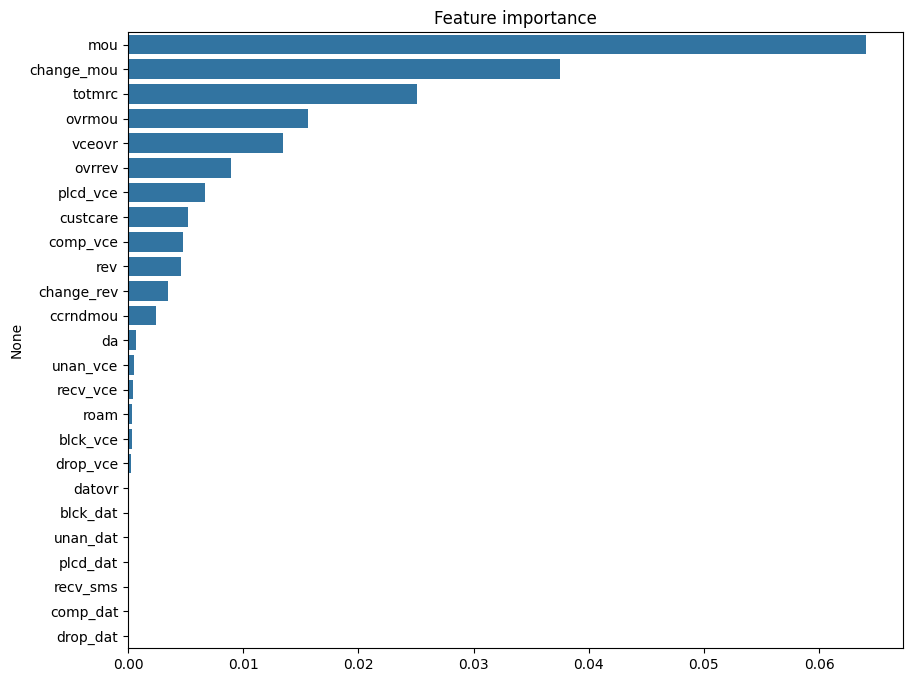

In [33]:
#feature importance
params = {'random_state': 42, 'n_jobs': 4, 'n_estimators': 100, 'max_depth': 4}
# se entrena un RandomForest y se plotean las variables que tuvieron más importancia en el modelo
y = df_churn_num['churn']
x = df_churn_num.drop('churn' ,axis=1)
# entrena un RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)
# Plotea las 25 mejores Features importances
features = clf.feature_importances_[:25]
columnas = x.columns[:25]
imp = pd.Series(data=features, index=columnas).sort_values(ascending=False)
plt.figure(figsize=(10,8))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, orient='h')
plt.show()

In [34]:
columnas = x.columns[:12]

In [35]:
print(columnas)

Index(['rev', 'mou', 'totmrc', 'da', 'ovrmou', 'ovrrev', 'vceovr', 'datovr',
       'roam', 'change_mou', 'change_rev', 'drop_vce'],
      dtype='object')


In [36]:
df_churn_num_top12 = df_churn_num[columnas]

In [37]:
df_churn_num_top12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85963 entries, 0 to 85962
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rev         85963 non-null  float64
 1   mou         85963 non-null  float64
 2   totmrc      85963 non-null  float64
 3   da          85963 non-null  float64
 4   ovrmou      85963 non-null  float64
 5   ovrrev      85963 non-null  float64
 6   vceovr      85963 non-null  float64
 7   datovr      85963 non-null  float64
 8   roam        85963 non-null  float64
 9   change_mou  85963 non-null  float64
 10  change_rev  85963 non-null  float64
 11  drop_vce    85963 non-null  float64
dtypes: float64(12)
memory usage: 7.9 MB


## Distribución del target

## Analisis Univariable

* Distribucion de cada variable

## Analisis Variable-Target

* Relacion target-variable

# Data Cleaning

* Eliminar filas sin target informado.
* Eliminar filas duplicadas (si tenemos ID, solo puede haber 1 registro por ID)
* Eliminar filas/columnas vacías y columnas irrelevantes
* Corregir data types incorrectos
* Categoricos: Corregir literales incorrectos (acentos, erratas, etc)
* Fechas y textos: convertir a variables numericas (hour, day, month, year...) o categoricas (weekday_name...)

# Imputación de nulos

* MODELOS DE ARBOLES: Imputar valor outlier.
* MODELOS LINEALES: imputar media, mediana o moda.
* Si vamos a practicar un Torneo de Modelos, preferible imputar valor outlier.

# Encoding categóricos

* Si tienen sentido ordinal, es decir, se pueden ordenar, encodear con una escala numerica. Ejemplo: {"Bajo":1, "Medio":2, "Alto":3}.
* Si tienen unicamente 2 clases, indicador booleano
* One Hot Encoding en resto de categoricos

# Eliminar alta correlación

* Analizar variables (X) altamente correlacionadas
* Eliminar una variable de cada pareja altamente correlacionada (>95% o >99%...) en el dataset (df)

# Eliminar baja varianza

* Eliminar variables (X) practicamente constantes con un threshold minimo (1% o menos)

# Guardar clean data

* Guardar en data path y mostrar el resultado en un head()